### GAN

생성적 적대 신경망(GAN)은 2014년에 처음 소개된 방식으로서 Generative Adversarial network이다.
- Generative(생성적): 데이터 자체를 생성한다.
- Adversarial(적대적): 적대란 대립하거나 상반되는 관계를 뜻한다. GAN에서는 생성네트워크와 구분 네트워크간의 상반되는 목적함수로 인해 적대성이 생기게 된다.
- Network: 생성자와 구분자의 구조가 인공 신경망의 형태를 이룬다.

GAN에서 가장 중요한 것은 **생성 네트워크와 구분 네트워크로서 상반되는 네트워크를 구성한다는 것 이다.**  
예를 들면 다음과 같다.  
> 위조지폐를 만드는 사람(생성 네트워크)과 위조지폐 감별사(구분 네트워크)가 있다.  
생성자가 처음에 만든 지폐는 쉽게 감별이 되겠지만 감별사를 속이는 것을 목표로 계속 학습하고 생성하다 보면 점점 감별사가 구분하기 어려운 수준까지 생성이 가능해진다는 것 이다.  
이때 위조지폐 생성자는 자신이 생성한 지폐가 진짜로 판별되기 원하고, 감별사는 가짜 지폐를 가짜로 판별하는 것을 목표로 하기 때문에 여기에서 적대성이 생기게 된다.

위와 같은 2가지의 상반되는 네트워크는 아래 그림과 같다.  
<img src="https://t1.daumcdn.net/cfile/tistory/994EFD3A5AD6EA2117"/>

위의 그림을 설명하기 위해서 다음과 같은 가정을 해보자.  
- D(x): Data를 실제 데이터는 1, 생성 데이터는 0으로 판별하는 함수
- G(x): Data를 생성하는 함수
- x: 실제 데이터
- z: Noise

위의 그림과 GAN의 최종적인 목적은 2개의 Network에 따라서 다음과 같이 구분될 수 있다.  
**구분자의 입장**
최종적인 목적은 D(x) = 1, D(G(z)) = 0, 으로서 학습되는 것 즉, 실제 데이터는 1, 만들어진 데이터는 0 으로서 판별되는 것을 목표로 한다.  
**생성자 입장**  
최종적인 목적은 D(G(z)) = 1 로서 만들어진 데이터를 1로서 판별되는 것을 목표로 한다.  

**D(G(z))에 대하여 2개의 Network가 상반되는 목표를 가지는 것을 알 수 있다.**  

### Adversarial Nets
위의 설명은 다음과 같이 정의 될 수 있다.  
$$ \underset{G}{min} \underset{D}{max}V(D,G) = \mathbb{E}_{x\text{~}P_{data}(x)}[logD(x)] + \mathbb{E}_{z\text{~}P_{z}(z)}[log(1 - D(G(z)))]$$
$$\mathbb{E}: \text{기대값}$$
$$x\text{~}P_{data}(x): \text{x를 실제 data의 분포에서 샘플링}$$
$$z\text{~}P_{z}(z): \text{z를 Noise의 분포에서 샘플링}$$

위에서 쓰여진 식을 D, G에 관해 나누어서 생각해보자  

**구분자**  
$$ \underset{D}{max}V(D,G) = \mathbb{E}_{x\text{~}P_{data}(x)}[logD(x)] + \mathbb{E}_{z\text{~}P_{z}(z)}[log(1 - D(G(z)))]$$
위에서 정의한 구분자의 목적은 실제 데이터는 1, 만들어진 데이터는 0 으로서 판별되는 것이다.  
이에 연관되어 <span>$\underset{D}{max}V(D,G) = \mathbb{E}_{x\text{~}P_{data}(x)}[logD(x)] + \mathbb{E}_{z\text{~}P_{z}(z)}[log(1 - D(G(z)))]$</span>에 넣어서 생각을 해보게 되면 D(x) = 1, D(G(z)) = 0, 으로서 학습되는 것이다.  

**생성자**  
$$ \underset{G}{min}V(D,G) = \mathbb{E}_{x\text{~}P_{data}(x)}[logD(x)] + \mathbb{E}_{z\text{~}P_{z}(z)}[log(1 - D(G(z)))]$$
위에서 정의한 생성자의 목적은 만들어진 데이터를 1로서 판별되는 것 이다. 
위의 목적에 맞게 다시 식을 작성하면 다음과 같다.  
$$ \underset{G}{min}V(D,G) = \mathbb{E}_{z\text{~}P_{z}(z)}[log(1 - D(G(z)))]$$
이에 연관되어 <span>$\underset{G}{min}V(D,G) = \mathbb{E}_{z\text{~}P_{z}(z)}[log(1 - D(G(z)))]$</span>에 넣어서 생각을 해보게 되면 D(G(z)) = 1 으로서 학습되는 것이다.  
**참고사항**으로서 **구분자와 생성자의 식을 분리하게 됨으로서 식을 다음과 같이 바꿀 수 있다.**  
$$ \underset{G}{max}V(D,G) = \mathbb{E}_{z\text{~}P_{z}(z)}[log( D(G(z)))]$$
위와 같이 식을 바꾸는 이유는 다음과 같다.  
처음 Noise로서 생성하는 Image는 Random한 Image로서 구분자가 너무 쉽게 Real Image와 구별할 수 있게 되어서 값이 너무 작게 나와서 Trainning의 시간이 매우 길어지게 된다.  
하지만 위와 같이 식을 바꿈으로 인하여 Fixed Point를 얻게 되면서도 Gradint의 값을 크게 줄 수 있다는 장점이 생기게 된다.  


논문에서의 이러한 상황을 그림으로서 표현하면 다음과 같다.  
<img src="https://1.bp.blogspot.com/-_ZpVHCkqwJI/WHjwzlgki8I/AAAAAAAABKk/e3xQukjtHBoxoQyLA7Fn-GhL7t8mgBFMwCK4B/s640/%25EA%25B7%25B8%25EB%25A6%25BC5.PNG"/>

위의 그림에서의 의미는 각각 다음과 같다.  
- 검은 점선: 실제 데이터의 분포(Data generating Distribution), <span>$p_{data}$</span>
- 녹색 점선: 생성된 데이터의 분포(Discriminator Distribution), <span>$p_{g}$</span>
- 파란 점선: 판별자가 데이터의 판별 결과 분포(Generative Distribution), <span>$D(x)$</span>

(a): 처음 시작할 때는 <span>$p_{data}$</span>와 <span>$p_{g}$</span>의 분포는 매우 다른 것을 알 수 있다.  
(b), (c): 이러한 상황에서 <span>$ \underset{G}{min} \underset{D}{max}V(D,G) = \mathbb{E}_{x\text{~}P_{data}(x)}[logD(x)] + \mathbb{E}_{z\text{~}P_{z}(z)}[log(1 - D(G(z)))]$</span>을 학습하다 보면 D(x)의 파란점선이 점점 smooth하고 잘 구별하는 Distribution이 만들어 진다.  
(d): Trainning의 최종적인 Distribution의 모양은 <span>$p_{data} = p_{g}$</span>으로서 <span>$D(x) = \frac{1}{2}$</span>의 값을 가지는 것을 알 수 있다.  

최종적인 목적으로서 앞에서 정의한 식  
$$ \underset{G}{min} \underset{D}{max}V(D,G) = \mathbb{E}_{x\text{~}P_{data}(x)}[logD(x)] + \mathbb{E}_{z\text{~}P_{z}(z)}[log(1 - D(G(z)))]$$
의 해결하기 위해서는 **<span>$p_{data} = p_{g}$</span>으로서 <span>$D(x) = \frac{1}{2}$</span>의 값을 가지는 것**을 찾는 문제로서 생각할 수 있다.

### Theoretical Results

위에서 <span>$p_g = p_{data}$</span>에서 최적의 global optimam을 가진다고 그림으로서 알아보았다.  

그렇다면 <span>$p_g = p_{data}$</span>에서 최적의 해가 1개인지 다른 해가 있는지를 알아보는 과정이 필요하다.  

그러한 과정을 위하여 먼저 선수 과정으로 알아야 하는 수식에 대해서 알아보자.  

 

#### 사전지식

본격적인 수식에 들어가기 전에 수식을 이해하기 위한 사전지식이 요구된다.  

요구되는 사전지식은 아래와 같다.  

<br>

**정보량**  

정보량이란 확률 p를 가지는 사건 A의 정보를 정의한다.  

$$I(m) = log(\frac{1}{p(m)}) = - log(p(m))$$

<br>

**Entropy**  

엔트로피란 어떤 다수의 메세지들에 대해서 각각의 정보량을 평균한 값을 의미한다.  

2가지의 Data의 형태에 따른 각각의 다른 수식에 대해서 알아보자.  

**(1) Discrete**  

$$H(M) = E\text{[}I(M)\text{[} = \sum_{m \in M}p(m)I(m) = -\sum_{m \in M}p(m)log p(m)$$

**(2) Continuous**  

$$H(X) = E\text{[}I(M)\text{[} = \int p(x)I(x)dx = - \int p(x)log(p(x))dx$$

 

추가적인 자세한 내용은 아래를 참조하자.  

<a href="https://wjddyd66.github.io/dl/2019/07/26/NeuralNetwork-(2)-Loss-Function.html">정보량과 Entropy에 대한 자세한 내용</a><br>

<br>

**Kullback-Leibler divergence(KL-Divergence)**  

KL-Divergenc는 어떤 확률 분포 p(x)와 q(x)의 유사한 정도를 계산하는 방법이다.  

KL-Divergence는 그 값이 작을 수록 두 분포가 유사하다는 의미를 가지고 0이되면 두 분포가 같다는 의미를 가진다.  

KL-Divergence를 계산하기 위해서는 Cross Entropy를 사용하여 p를 q로 설명하는 정보량을 뜻하는 Cross Entropy에서 p가 자기자신을 설명하는 정보량인 p의 엔트로피의 차이가 KL-Divergence가 된다.  

**즉 두 확률분포의 Cross Entropy의 값과 자기자신의 Entropy의 값이 같으면 두 확률분포는 같다는 Idea에서 시작하는 수식이다.**  

$$D_{KL}(p||q) = H(p,q) - H(p)$$

$$= -\sum_{x \in X}p(x)log(q(x)) - (-\sum_{x \in X}p(x)log(p(x)))$$

$$= \sum_{x \in X}p(x)(log(p(x)) - log(q(x)))$$

$$= \sum_{x \in X}p(x)log\frac{p(x)}{q(x)}$$  

참조:<a href="https://reniew.github.io/17/">reniew 블로그</a><br>

<br>

 

#### Global Optimality of <span>$p_g = p_{data}$</span>

먼저 다음과 같은 가정을 하자  

**Proposition 1.** for G fixed, the optimal discriminator D is  

$$D_G^*(x) = \frac{p_{data}(x)}{p_{data}(x) + p_g(x)}$$

 

위의 결과는 아래와 같은 과정으로서 이루워 진다.  

$$V(G,D) = \mathbb{E}_{x \text{~} p_{data}(x)}\text{[}logD(x)\text{]} + \mathbb{E}_{x \text{~} p_{z}(z)}\text{[}1 - logD(G(z))\text{]}$$

$$= \int_x p_{data}(x) log(D(x)) dx + \int_z p_{z}(x) log(1 - D(G(z))) dz$$

$$= \int_x p_{data}(x) log(D(x)) dx + p_g log(1-D(x))$$

위의 식을 간단히 하기 위하여 다음과 같이 치환하여 생각을 해보자.  

$$y = alog(y) + blog(1-y)$$

$$y\prime = \frac{a}{y} - \frac{b}{1-y} = \frac{a}{y} = \frac{b}{y - 1}$$

$$= \frac{a(y-1) + by}{y(y-1)}$$

$$= \frac{ay -a + by}{y(y-1)}$$

위의 조건에서 만약 <span>$y \neq 0,1$</span>이라면 <span>$y\prime = 0$</span>의 조건은  

$$ay - a + by = 0 $$

$$y = \frac{a}{a+b}$$

위에서 얻은 식에 <span>$a = p_{data}, b=p_g$</span>를 대입하게 되면

$$D_G^*(x) = \frac{p_{data}(x)}{p_{data}(x) + p_g(x)}$$

위에서 선언한 식을 알 수 있다.  

 

최종적으로 얻고자 하는 global minumum을 <span>$C(G)$</span>라 하면 다음과 같은 식을 유도할 수 있다.  

$$C(G) = \underset{D}{max}V(G,D)$$

$$= \mathbb{E}_{x \text{~} p_{data}}\text{[}logD^{*}_{G}(x)\text{]} + \mathbb{E}_{z \text{~} p_{z}}\text{[}1 - logD^{*}_{G}(G(z))\text{]}$$

$$= \mathbb{E}_{x \text{~} p_{data}}\text{[}logD^{*}_{G}(x)\text{]} + \mathbb{E}_{x \text{~} p_{g}}\text{[}1 - logD^{*}_{G}(x)\text{]}$$

$$= \mathbb{E}_{x \text{~} p_{data}}\text{[}log\frac{p_{data}(x)}{p_{data}(x) + p_g(x)}\text{]} + \mathbb{E}_{x \text{~} p_g}\text{[}1 - log\frac{p_{data}(x)}{p_{data}(x) + p_g(x)}\text{]}$$

 

위에서 증명한 식을 사용하여 이제 실질적인 main theorem을 증명해 보자.  

<br>

**Theorem 1.** The global minimum of the virtual training criterion C(G) is achieved if and only if <span>$p_g = p_{data}$</span> At that point, C(G) achieves the value -log4

 

가장 최적의 해가 되는 때는 <span>$p_{data} = p_g$</span>이고 이때의 <span>$D^{*}_{G}(x) = \frac{1}{2}$</span>라고 가장 먼저 그림으로서 증명하였다.  

이러한 값을 **Proposition 1 에서 얻은 최종적인 값**에 대입하게 되면 다음과 같다.  

$$C(G) = \mathbb{E}_{x \text{~} p_{data}}\text{[}-log(2)\text{]} + \mathbb{E}_{x \text{~} p_g}\text{[}-log(2)\text{]} = -log(4)$$

위의 식의 결과를 좀더 정리하면 다음과 같다.  

$$C(G) = C(G) + log(4) - log(4)$$

$$= \mathbb{E}_{x \text{~} p_{data}}\text{[}log\frac{p_{data}(x)}{p_{data}(x) + p_g(x)}\text{]} + \mathbb{E}_{z \text{~} p_z}\text{[} log\frac{p_{data}(x)}{p_{data}(x) + p_g(x)}\text{]} +log(4) - log(4)$$

$$= \mathbb{E}_{x \text{~} p_{data}}\text{[}log\frac{p_{data}(x)}{p_{data}(x) + p_g(x)}\text{]} + \mathbb{E}_{z \text{~} p_z}\text{[} log\frac{p_{data}(x)}{p_{data}(x) + p_g(x)}\text{]} +log(4) - log(4) +log(2) + log(2) - log(4)$$

$$= \mathbb{E}_{x \text{~} p_{data}}\text{[}log\frac{2p_{data}(x)}{p_{data}(x) + p_g(x)}\text{]} + \mathbb{E}_{z \text{~} p_z}\text{[} log\frac{2p_{data}(x)}{p_{data}(x) + p_g(x)}\text{]}- log(4)$$

위의 식에서 <span>$\mathbb{E}_{x \text{~} p_{data}}\text{[}log\frac{2p_{data}(x)}{p_{data}(x) + p_g(x)}\text{]}$</span>과 <span>$\mathbb{E}_{z \text{~} p_z}\text{[} log\frac{2p_{data}(x)}{p_{data}(x) + p_g(x)}\text{]}- log(4)$</span>에 각각 **KL-Divergence**를 적용하면 다음과 같은 수식이 나오게 된다.  

$$C(G) = KL(p_{data} || \frac{p_{data}+p_g}{2}) + KL(p_{g} || \frac{p_{data}+p_g}{2}) - log(4)$$

$$= 2JSD(p_{data}||p_g) - log(4)$$

$$\because JSD(P||Q) = \frac{1}{2}D_{KL}(P||M) + \frac{1}{2}D_{KL}(Q||M)$$

 

$$C(G) = -log(4) = -log(4) + 2JSD(p_{data}||p_g)$$

$$\therefore JSD(p_{data}||p_g) = 0$$

위의 식에서 **KL-Divergence**에서도 얘기하였지만 KL-Divergence는 그 값이 작을 수록 두 분포가 유사하다는 의미를 가지고 0이되면 두 분포가 같다는 의미를 가진다.  

따라서 <span>$JSD(p_{data}||p_g) = 0$</span>의 값을 가지기 위해서는  

**$$p_{data} = p_g$$**

**위의 최종적인 식이 유일한 최적의 global optimam인 것을 알 수 있다.**  

결과적으로 앞서 정의한 global optimam을 찾으면 generator가 만드는 probatility distribution(<span>$p_g$</span>, generator에서 만든 data의 분포)와 data distribution(<span>$p_{data}$</span>, 실제 데이터의 분포)가 정확히 일치하도록 할 수 있다.  

하지만, 이러한 Model을 사용하는 것이 global optimam을 잘 찾아가는 것인거와는 다른 문제이다.  

즉, 해를 정의하는 것과 그 해를 찾아갈 수 있는 것과는 별개의 문제이다.

참조:<a href="http://jaejunyoo.blogspot.com/2017/01/generative-adversarial-nets-2.html">jaejunyoo 블로그</a><br>


#### Convergence of Algorithm1

**Proposition 2.** If G and D have enough capacity, and at each step of Algorithm1, the discriminator is allowed to reach its optimum given G, and <span>$p_g$</span> is updated so as to improve the criterion  

$$\mathbb{E}_{x \text{~} p_{data}}\text{[}logD^{*}_{G}(x)\text{]} + \mathbb{E}_{x \text{~} p_g}\text{[} log(1 - D^{*}_{G}(x))\text{]}$$  

then <span>$p_g$</span> converges to <span>$p_{data}$</span>

논문에서의 가장 첫 증명은 <span>$V(G,D) = U(p_g,D)$</span> as a function of <span>$p_g$</span> as done in the above criterion. Note that <span>$U(p_g,D)$</span> is convex in <span>$p_g$</span>

즉 <span>$U(p_g,D)$</span>가 <span>$p_g$</span>에 대하여 Convex하다는 것이 가장 중요시 된다.  
위의 식을 살펴보게 되면 다음과 같다.  
$$V(G,D) = U(p_g,D) = \mathbb{E}_{x \text{~} p_{data}}\text{[}log\frac{p_{data}(x)}{p_{data}(x) + p_g(x)}\text{]} + \mathbb{E}_{x \text{~} p_g}\text{[} log\frac{p_{g}(x)}{p_{data}(x) + p_g(x)}\text{]}$$
위의 식을 <span>$p_g$</span>에 나타내기 위하여 <span>$p_{data}$</span>를 상수로 잠시 치환하자면 다음과 같은 식이 나오게 된다.  
$$U(p_g,D) = \mathbb{E}_{x \text{~} p_{data}}\text{[}log\frac{\alpha}{\alpha + p_g(x)}\text{]} + \mathbb{E}_{x \text{~} p_g}\text{[} log\frac{p_g(x)}{\alpha + p_g(x)}\text{]}$$

로그함수의 그래프를 살펴보면 아래와 같다.  
<img src="//upload.wikimedia.org/wikipedia/commons/thumb/7/73/Logarithms.svg/315px-Logarithms.svg.png"/>
<br>
Log 함수는 **Concave**하다는 것을 알 수 있다.  
따라서 다음과 같은 식이 성립한다는 것을 알 수 있다.  
$$\frac{\alpha}{\alpha + p_g(x + t)} > \frac{\alpha}{\alpha + p_g(x)}$$
$$p_g(x) > p_g(x + t)$$
$$\therefore U(p_g,D) \text{ is Convex in } p_g$$

<span>$U(p_g,D) \text{ is Convex in } p_g$</span>가 **Convex**하다는 가정을 하고 아래와 같이 수식을 치환한다고 하면    
$$\partial(sup_DU(p_g,D)) = \partial f$$
$$sup: \text{supremum(상한) 또는 최소 상계(least upper bound)로서 집합의 모든 상계 z에 대해 z0≤z를 만족하는 값. 즉, min(z)를 의미한다.}$$
$$\partial f_{D^*(p_g)} \in \partial f$$
위의 식을 만족하게 된다.  
즉 <span>$U(p_g,D) \text{ is Convex in } p_g$</span>가 **Convex**하기 때문에 <span>$\underset{G}{min} \underset{D}{max}V(D,G) = \mathbb{E}_{x\text{~}P_{data}(x)}[logD(x)] + \mathbb{E}_{z\text{~}P_{z}(z)}[log(1 - D(G(z)))]$</span>에서 <span>$\underset{G}{min}$</span>을 수행하여 만족하는 <span>$p_g$</span>을 구할 수 있다.
최종적인 결과 로서 위에  
**Theorem 1.** The global minimum of the virtual training criterion C(G) is achieved if and only if <span>$p_g = p_{data}$</span> At that point, C(G) achieves the value -log4<br>
에서 **Global Optima**는 1개라는 정의를 하였으므로  
<span>$p_g$</span>를 Update하여 <span>$p_g -> p_{data}$</span>을 만족시킬 수 있는 것을 알 수 있다.
<br>

#### 참고사항(Convex)
Convex function은 convex한 function을 의미한다. 이때의 convex는 한국어로 옮기면 볼록 이라는 의미를 가지게 된다.  
Convex function의 조건은 다음과 같다.  
$$f(tx + (1-t)y) <= tf(x) + (1-t)f(y)$$
<img src="http://sanghyukchun.github.io/images/post/63-1.png"/>
<br>
Convex function이 좋은 이유는 반드시 optimal한 값이 하나 밖에 존재하지 않는 다는 것 이다.  
**Concave**의 경우 Convex와 반대의 성질을 가지고 있다.  
<a href="https://hwiyong.tistory.com/7?category=805068">Convex의 자세한 내용</a><br>

In [1]:
%reload_ext autoreload
%autoreload

### Model 구현
#### 1. Import required libraries

In [2]:
# 단순한 GAN 모델 생성 및 OrderedDict 사용법

import os
import torch
import torch.nn as nn
import torch.utils as utils
import torch.nn.init as init
import torchvision.utils as v_utils
import torchvision.datasets as dset
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

#### 2. Hyperparameter setting

In [3]:
# Set Hyperparameters
# change num_gpu to the number of gpus you want to use

epoch = 50
batch_size = 512
learning_rate = 0.0002
num_gpus = 1
z_size = 50
middle_size = 200

#### 3. Data Setting

In [4]:
# Download Data

mnist_train = dset.MNIST("./", train=True, transform=transforms.ToTensor(), target_transform=None, download=True)

# Set Data Loader(input pipeline)

train_loader = torch.utils.data.DataLoader(dataset=mnist_train,batch_size=batch_size,shuffle=True,drop_last=True)

#### 4. Generator
OrderDict를 사용하게 되면 Dict와 달리 순서가 저장되는 딕셔너리 이다.  
Generator는 Noise를 Input으로 받아서 Input Data와 비슷한 Data를 만드는 것을 목표로 한다.

In [5]:
# Generator receives random noise z and create 1x28x28 image
# OrderedDict를 사용해 해당 연산의 이름을 지정할 수 있습니다.

class Generator(nn.Module):
    def __init__(self):
        super(Generator,self).__init__()
        self.layer1 = nn.Sequential(OrderedDict([
                        ('fc1',nn.Linear(z_size,middle_size)),
                        ('bn1',nn.BatchNorm1d(middle_size)),
                        ('act1',nn.ReLU()),
        ]))
        self.layer2 = nn.Sequential(OrderedDict([
                        ('fc2', nn.Linear(middle_size,784)),
                        #('bn2', nn.BatchNorm1d(784)),
                        ('tanh', nn.Tanh()),
        ]))
    def forward(self,z):
        out = self.layer1(z)
        out = self.layer2(out)
        out = out.view(batch_size,1,28,28)
        return out

#### 5. Discriminator
구분자는 Input Data와 생성된 Data를 구별하는 역할을 한다.  
True는 1, False는 0으로서 구별하기 위하여 최종적인 결과는 Sigmoid를 통하여 계산하게 된다.

In [6]:
# Discriminator receives 1x28x28 image and returns a float number 0~1
# we can name each layer using OrderedDict

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator,self).__init__()
        self.layer1 = nn.Sequential(OrderedDict([
                        ('fc1',nn.Linear(784,middle_size)),
                        #('bn1',nn.BatchNorm1d(middle_size)),
                        ('act1',nn.LeakyReLU()),  
            
        ]))
        self.layer2 = nn.Sequential(OrderedDict([
                        ('fc2', nn.Linear(middle_size,1)),
                        ('bn2', nn.BatchNorm1d(1)),
                        ('act2', nn.Sigmoid()),
        ]))
                                    
    def forward(self,x):
        out = x.view(batch_size, -1)
        out = self.layer1(out)
        out = self.layer2(out)
        return out

#### 6. Put instances on Multi-gpu
여러대의 GPU 혹은를 사용하기 위해서는 Pytorch에서는 <code>nn.DataParallel()</code>사용  
특정 Device를 지정하기 위해서는 devices_ids=[0,1,2, ...]처럼 Device의 번호를 인수로서 담아서 넣어주면 된다.  
만약 적지 않으면 사용 가능한 모든 GPU에 Module이 올라가게 된다.  
ex)
```python
generator = nn.DataParallel(Generator(),device_ids = [0,1,2,3,4,5])
```
<br>
참고: <a href="https://pytorch.org/tutorials/beginner/blitz/data_parallel_tutorial.html">DataParallel 사용법(Pytorch 공식 사이트)</a>

In [7]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)

generator = nn.DataParallel(Generator()).to(device)
discriminator = nn.DataParallel(Discriminator()).to(device)

cuda


#### 7. Check layers

In [8]:
# Get parameter list by using class.state_dict().keys()

gen_params = generator.state_dict().keys()
dis_params = discriminator.state_dict().keys()

for i in gen_params:
    print(i)

module.layer1.fc1.weight
module.layer1.fc1.bias
module.layer1.bn1.weight
module.layer1.bn1.bias
module.layer1.bn1.running_mean
module.layer1.bn1.running_var
module.layer1.bn1.num_batches_tracked
module.layer2.fc2.weight
module.layer2.fc2.bias


#### 8. Set Loss function & Optimizer
- Loss Function: MSE
- Optimizer: Adam

In [9]:
# loss function, optimizers, and labels for training

loss_func = nn.MSELoss()
gen_optim = torch.optim.Adam(generator.parameters(), lr=learning_rate,betas=(0.5,0.999))
dis_optim = torch.optim.Adam(discriminator.parameters(), lr=learning_rate,betas=(0.5,0.999))

ones_label = torch.ones(batch_size,1).to(device)
zeros_label = torch.zeros(batch_size,1).to(device)

#### 9. Restore Model

In [10]:
# model restore if any

try:
    generator, discriminator = torch.load('./model/vanilla_gan.pkl')
    print("\n--------model restored--------\n")
except:
    print("\n--------model not restored--------\n")
    pass
  
try:
  os.mkdir("./model")
except:
  pass

try:
  os.mkdir("./result")
except:
  pass


--------model restored--------



#### 10. Train Model
Generator에서 Input Data를 받는것이 아니라 Noise를 Input으로 받는다는 가정을 하였기 때문에 Input Data -> Noise로 변환하여 Generator에 Input으로 넣는 과정이 필요하다.  
<code>z = init.normal_(torch.Tensor(batch_size,z_size),mean=0,std=0.1).to(device)</code><br>
**최종적인 식**  
$$ \underset{G}{min} \underset{D}{max}V(D,G) = \mathbb{E}_{x\text{~}P_{data}(x)}[logD(x)] + \mathbb{E}_{z\text{~}P_{z}(z)}[log(1 - D(G(z)))]$$

**구분자**  
$$ \underset{D}{max}V(D,G) = \mathbb{E}_{x\text{~}P_{data}(x)}[logD(x)] + \mathbb{E}_{z\text{~}P_{z}(z)}[log(1 - D(G(z)))]$$

**생성자**
$$ \underset{G}{max}V(D,G) = \mathbb{E}_{z\text{~}P_{z}(z)}[log( D(G(z)))]$$
을 각각 적용한다.

In [11]:
# train

for i in range(epoch):
    for j,(image,label) in enumerate(train_loader):
        image = image.to(device)
        
        # 구분자 학습
        dis_optim.zero_grad()
      
        # Fake Data 
        # 랜덤한 z를 샘플링해줍니다.
        z = init.normal_(torch.Tensor(batch_size,z_size),mean=0,std=0.1).to(device)
        gen_fake = generator.forward(z)
        dis_fake = discriminator.forward(gen_fake)
        
        # Real Data
        dis_real = discriminator.forward(image)
        
        # 두 손실을 더해 최종손실에 대해 기울기 게산을 합니다.
        dis_loss = torch.sum(loss_func(dis_fake,zeros_label)) + torch.sum(loss_func(dis_real,ones_label))
        dis_loss.backward(retain_graph=True)
        dis_optim.step()
        
        # 생성자 학습
        gen_optim.zero_grad()
        
        # Fake Data
        z = init.normal_(torch.Tensor(batch_size,z_size),mean=0,std=0.1).to(device)
        gen_fake = generator.forward(z)
        dis_fake = discriminator.forward(gen_fake)
        
        gen_loss = torch.sum(loss_func(dis_fake,ones_label)) # fake classified as real
        gen_loss.backward()
        gen_optim.step()
    
        # model save
        if j % 100 == 0:
            print(gen_loss,dis_loss)
            torch.save([generator,discriminator],'./model/vanilla_gan.pkl')            
            v_utils.save_image(gen_fake.cpu().data[0:25],"./result/gen_{}_{}.png".format(i,j), nrow=5)
            print("{}th epoch gen_loss: {} dis_loss: {}".format(i,gen_loss.data,dis_loss.data))

tensor(0.3454, device='cuda:0', grad_fn=<SumBackward0>) tensor(0.4220, device='cuda:0', grad_fn=<AddBackward0>)
0th epoch gen_loss: 0.3454473614692688 dis_loss: 0.4220327138900757


/home/theia/.local/lib/python3.6/site-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type Generator. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/theia/.local/lib/python3.6/site-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type Discriminator. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


tensor(0.3454, device='cuda:0', grad_fn=<SumBackward0>) tensor(0.4214, device='cuda:0', grad_fn=<AddBackward0>)
0th epoch gen_loss: 0.34544867277145386 dis_loss: 0.4214032292366028
tensor(0.3454, device='cuda:0', grad_fn=<SumBackward0>) tensor(0.4207, device='cuda:0', grad_fn=<AddBackward0>)
1th epoch gen_loss: 0.34544602036476135 dis_loss: 0.4206679165363312
tensor(0.3454, device='cuda:0', grad_fn=<SumBackward0>) tensor(0.4212, device='cuda:0', grad_fn=<AddBackward0>)
1th epoch gen_loss: 0.3454433083534241 dis_loss: 0.4212286174297333
tensor(0.3454, device='cuda:0', grad_fn=<SumBackward0>) tensor(0.4208, device='cuda:0', grad_fn=<AddBackward0>)
2th epoch gen_loss: 0.34544092416763306 dis_loss: 0.4208095371723175
tensor(0.3454, device='cuda:0', grad_fn=<SumBackward0>) tensor(0.4213, device='cuda:0', grad_fn=<AddBackward0>)
2th epoch gen_loss: 0.3454432487487793 dis_loss: 0.42127180099487305
tensor(0.3454, device='cuda:0', grad_fn=<SumBackward0>) tensor(0.4217, device='cuda:0', grad_fn=

tensor(0.3454, device='cuda:0', grad_fn=<SumBackward0>) tensor(0.4222, device='cuda:0', grad_fn=<AddBackward0>)
23th epoch gen_loss: 0.34544438123703003 dis_loss: 0.42221468687057495
tensor(0.3454, device='cuda:0', grad_fn=<SumBackward0>) tensor(0.4215, device='cuda:0', grad_fn=<AddBackward0>)
24th epoch gen_loss: 0.34544575214385986 dis_loss: 0.42151209712028503
tensor(0.3454, device='cuda:0', grad_fn=<SumBackward0>) tensor(0.4229, device='cuda:0', grad_fn=<AddBackward0>)
24th epoch gen_loss: 0.34544846415519714 dis_loss: 0.4228954017162323
tensor(0.3454, device='cuda:0', grad_fn=<SumBackward0>) tensor(0.4210, device='cuda:0', grad_fn=<AddBackward0>)
25th epoch gen_loss: 0.34544801712036133 dis_loss: 0.42095625400543213
tensor(0.3454, device='cuda:0', grad_fn=<SumBackward0>) tensor(0.4225, device='cuda:0', grad_fn=<AddBackward0>)
25th epoch gen_loss: 0.3454478085041046 dis_loss: 0.4225461483001709
tensor(0.3454, device='cuda:0', grad_fn=<SumBackward0>) tensor(0.4205, device='cuda:0', 

tensor(0.3454, device='cuda:0', grad_fn=<SumBackward0>) tensor(0.4212, device='cuda:0', grad_fn=<AddBackward0>)
46th epoch gen_loss: 0.34544599056243896 dis_loss: 0.42124998569488525
tensor(0.3454, device='cuda:0', grad_fn=<SumBackward0>) tensor(0.4208, device='cuda:0', grad_fn=<AddBackward0>)
47th epoch gen_loss: 0.34544286131858826 dis_loss: 0.4208010733127594
tensor(0.3454, device='cuda:0', grad_fn=<SumBackward0>) tensor(0.4212, device='cuda:0', grad_fn=<AddBackward0>)
47th epoch gen_loss: 0.3454424738883972 dis_loss: 0.421194851398468
tensor(0.3454, device='cuda:0', grad_fn=<SumBackward0>) tensor(0.4235, device='cuda:0', grad_fn=<AddBackward0>)
48th epoch gen_loss: 0.3454412519931793 dis_loss: 0.4234914183616638
tensor(0.3454, device='cuda:0', grad_fn=<SumBackward0>) tensor(0.4221, device='cuda:0', grad_fn=<AddBackward0>)
48th epoch gen_loss: 0.3454456925392151 dis_loss: 0.4221133589744568
tensor(0.3454, device='cuda:0', grad_fn=<SumBackward0>) tensor(0.4208, device='cuda:0', grad_

#### Check Result
학습이 거의 이루워 지지 않은 것을 알 수 있다.  
추가적인 방법을 추가하여 학습이 필요한 상태이다.

0


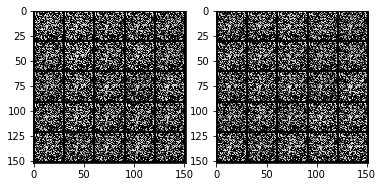

1


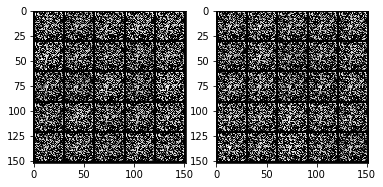

2


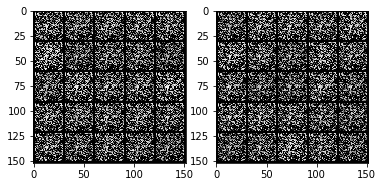

3


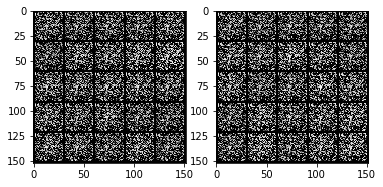

4


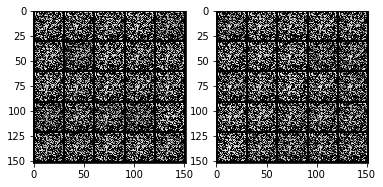

5


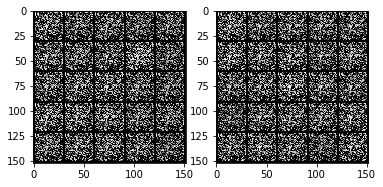

6


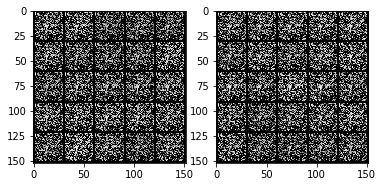

7


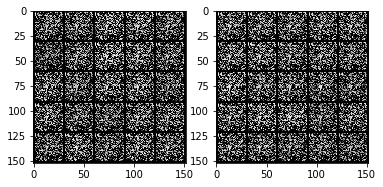

8


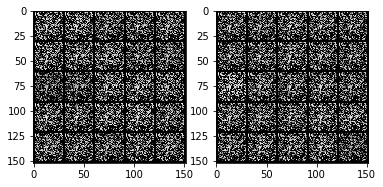

9


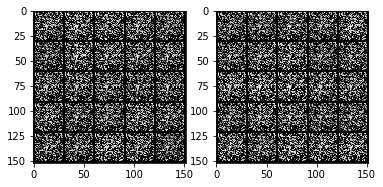

10


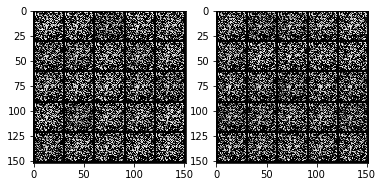

11


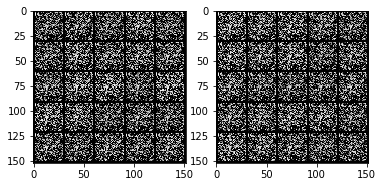

12


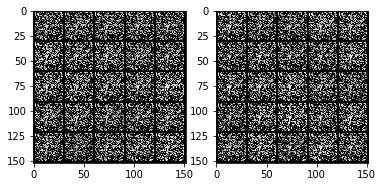

13


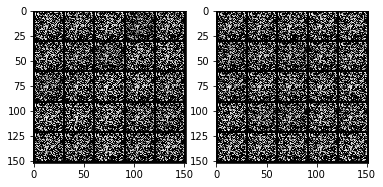

14


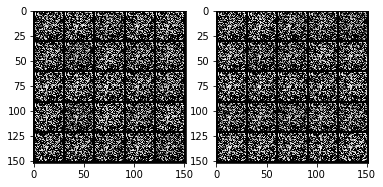

15


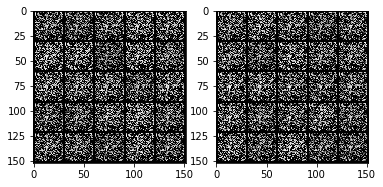

16


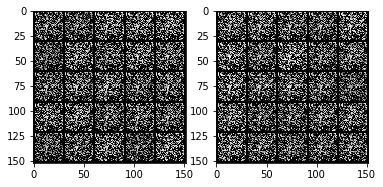

17


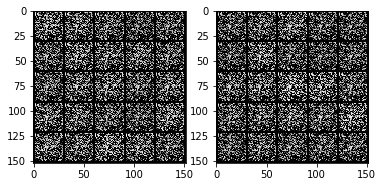

18


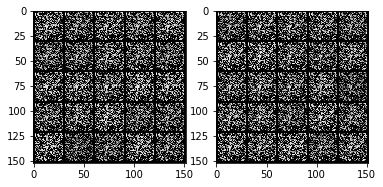

19


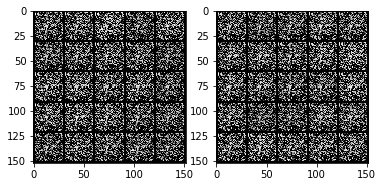

20


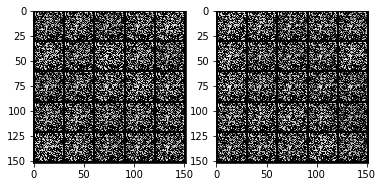

21


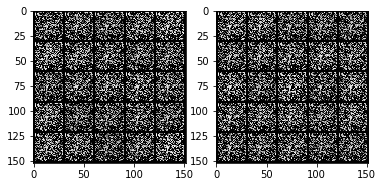

22


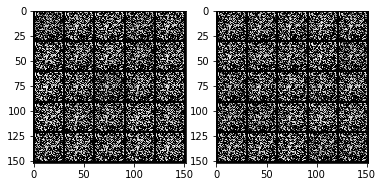

23


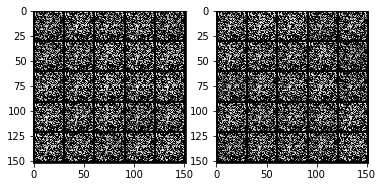

24


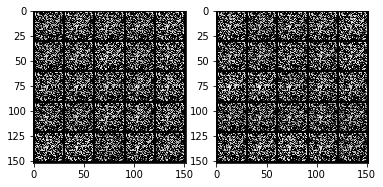

25


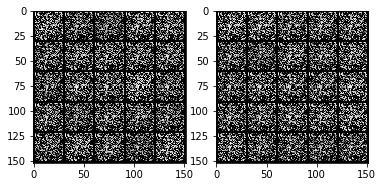

26


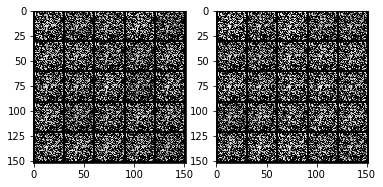

27


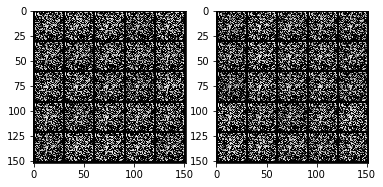

28


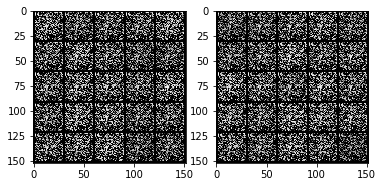

29


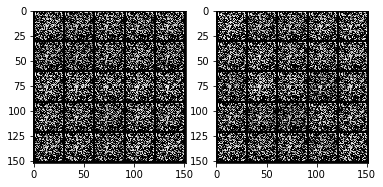

30


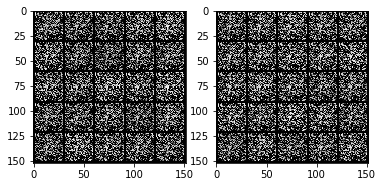

31


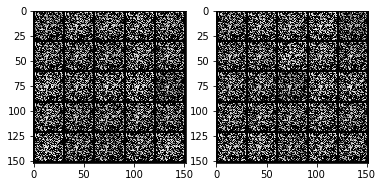

32


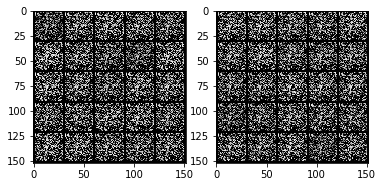

33


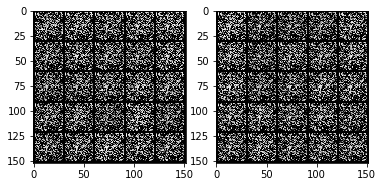

34


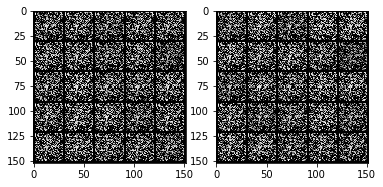

35


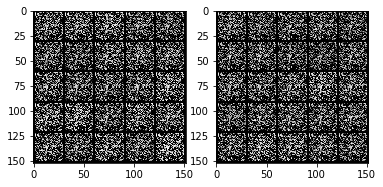

36


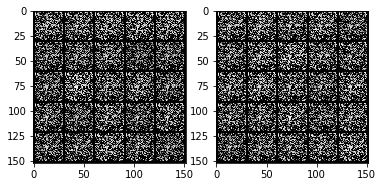

37


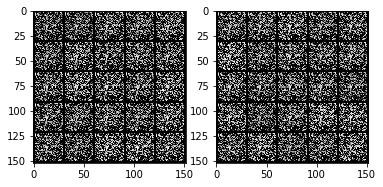

38


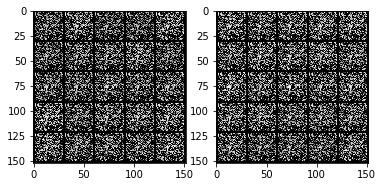

39


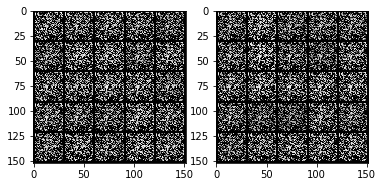

40


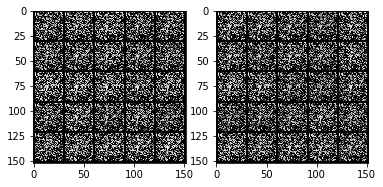

41


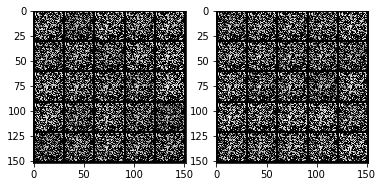

42


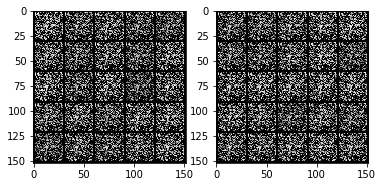

43


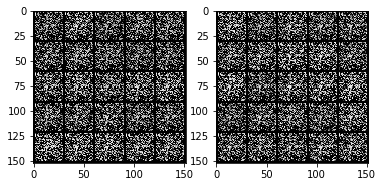

44


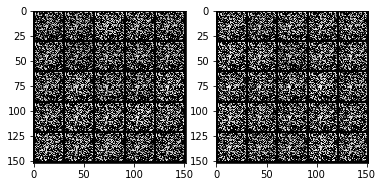

45


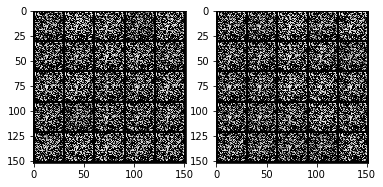

46


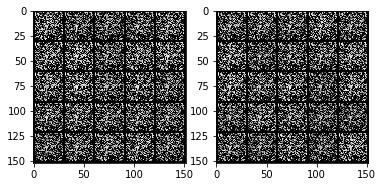

47


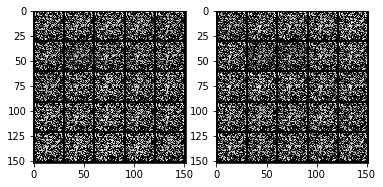

48


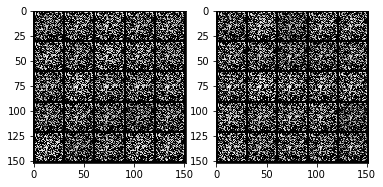

49


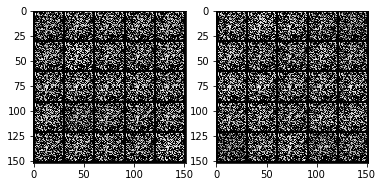

In [12]:
from glob import glob 

for i in range(epoch):
  print(i)
  file_list = glob("./result/gen_{}_*.png".format(i))
  img_per_epoch = len(file_list)
  for idx,j in enumerate(file_list):
    img = plt.imread(j)
    plt.subplot(1,img_per_epoch,idx+1)
    plt.imshow(img)
  plt.show()